In [15]:
import geopandas
from matplotlib import pyplot as plt

In [10]:
city = geopandas.read_file('zip://city.zip')
water = geopandas.read_file('zip://water.zip')
police = geopandas.read_file('zip://police.zip')
fire = geopandas.read_file('zip://fire.zip')

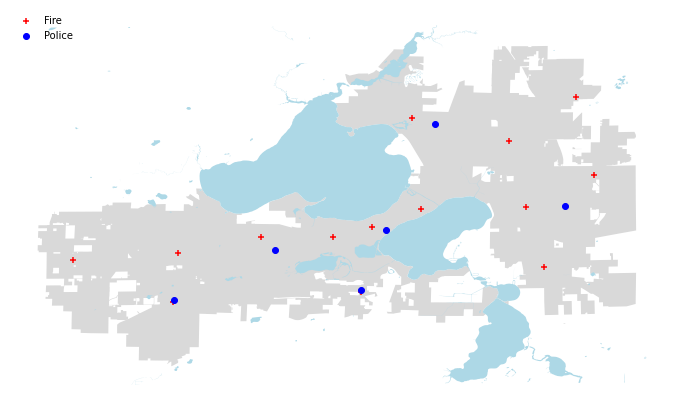

In [21]:
ax = city.plot(color='0.85', figsize=(12, 12))
water.plot(ax=ax, color='lightblue')
fire.plot(ax=ax, color='r', marker='+',label='Fire')
police.plot(ax=ax, color='b',label='Police')
plt.legend(loc='upper left', frameon = False)
ax.set_axis_off()

In [31]:
fid = ax.get_figure()
fig.dpi

72.0

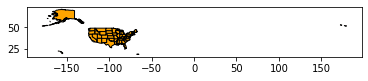

In [22]:
import geopandas
us = geopandas.read_file("zip://states.zip")
us.plot(color="orange", edgecolor="k")

In [24]:
us["STUSPS"]

0     MD
1     IA
2     DE
3     OH
4     PA
5     NE
6     WA
7     PR
8     AL
9     AR
10    NM
11    TX
12    CA
13    KY
14    GA
15    WI
16    OR
17    MO
18    VA
19    TN
20    LA
21    NY
22    MI
23    ID
24    FL
25    AK
26    IL
27    MT
28    MN
29    IN
30    MA
31    KS
32    NV
33    VT
34    CT
35    NJ
36    DC
37    NC
38    UT
39    ND
40    SC
41    MS
42    CO
43    SD
44    OK
45    WY
46    WV
47    ME
48    HI
49    NH
50    AZ
51    RI
Name: STUSPS, dtype: object

In [25]:
us.set_index("STUSPS", drop=False, inplace=True)
continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
ak = us.loc["AK":"AK"]
hi = us.loc["HI":"HI"]
pr = us.loc["PR":"PR"]

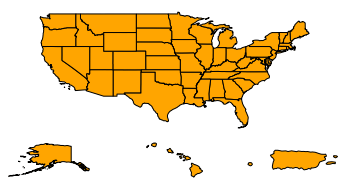

In [29]:
fig = plt.figure()
gs = fig.add_gridspec(5, 3)
ax1 = fig.add_subplot(gs[:3, :])
ax2 = fig.add_subplot(gs[3, 0])
ax3 = fig.add_subplot(gs[3, 1])
ax4 = fig.add_subplot(gs[3, 2])
continent.plot(color="orange", edgecolor="k", ax=ax1)
ak.plot(color="orange", edgecolor="k", ax=ax2)
hi.plot(color="orange", edgecolor="k", ax=ax3)
pr.plot(color="orange", edgecolor="k", ax=ax4)
ax2.set_xlim(-180, -120)
for ax in fig.axes:
    ax.axis("off")

In [42]:
from shapely.geometry import Polygon, Point
from matplotlib import pyplot as plt
from descartes import PolygonPatch

(0.0, 3.0, 0.0, 2.0)

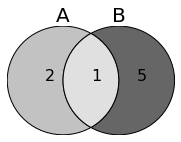

In [64]:
a_set = {1,2,3}
b_set = {3,4,5,6,7,8}

qa = len(a_set.difference(b_set))
qb = len(b_set.difference(a_set))
qab = len(a_set.intersection(b_set))
q_max = max(qa, qb, qab)

fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0,3)
ax.set_ylim(0,2)
c1 = Point(1,1).buffer(1)
ax.text(1, 2, 'A', size=20, va='bottom', ha='center')
c2 = Point(2,1).buffer(1)
ax.text(2, 2, 'B', size=20, va='bottom', ha='center')
A = c1.difference(c2)
B = c2.difference(c1)
AB = c1.intersection(c2)
for quantity, area in [(qa, A),(qb, B), (qab, AB)]:
    percent_of_max = quantity/q_max
    bg_color = (1-percent_of_max)*0.6+0.4
    ax.add_artist(PolygonPatch(area, facecolor=str(bg_color)))
    ax.text(area.centroid.x, area.centroid.y, quantity, size=16)
plt.axis('off')

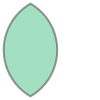

In [48]:
c1 = Point(1,1).buffer(1)
c2 = Point(2,1).buffer(1)
c1.intersection(c2)

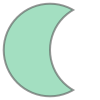

In [49]:
c1.difference(c2)

In [69]:
def venn(a_label, a_set, b_label, b_set):
    qa = len(a_set.difference(b_set))
    qb = len(b_set.difference(a_set))
    qab = len(a_set.intersection(b_set))
    q_max = max(qa, qb, qab)
    
    fig, ax = plt.subplots(figsize=(3,2))
    ax.set_xlim(0,3)
    ax.set_ylim(0,2)
    c1 = Point(1,1).buffer(1)
    ax.text(1, 2, a_label, size=20, va='bottom', ha='right')
    c2 = Point(2,1).buffer(1)
    ax.text(2, 2, b_label, size=20, va='bottom', ha='left')
    
    A = c1.difference(c2)
    B = c2.difference(c1)
    AB = c1.intersection(c2)
    
    for quantity, area in [(qa, A),(qb, B), (qab, AB)]:
        percent_of_max = quantity/q_max
        bg_color = (1-percent_of_max)*0.6+0.4
        ax.add_artist(PolygonPatch(area, facecolor=str(bg_color)))
        ax.text(area.centroid.x, area.centroid.y, quantity, size=16)
    plt.axis('off')

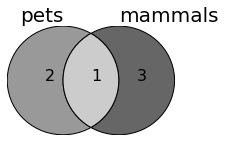

In [70]:
venn("pets", {"dogs", "snakes", "birds"}, 
     "mammals", {"dogs", "cats", "whales", "gorillas"})